In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%cd '/content/drive/My Drive'

/content/drive/My Drive/ITAú/TCC


In [0]:
from core.utils import *
from core.u_inception_net import *
from core.multiclass_u_inception_net import *

In [0]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import random
from keras.optimizers import Adam
from tqdm import tqdm

%matplotlib inline

In [0]:
unet_model = MulticlassUInceptionNet(classes = ["edifications", "secroads"])
unet_model.load_UNET_model("edifications", 'edifications_pre_UINmodel_v1.h5')
unet_model.load_UNET_model("secroads", 'secroads_UINmodel_pre_v1.h5')

100%|██████████| 324/324 [01:32<00:00,  3.51it/s]


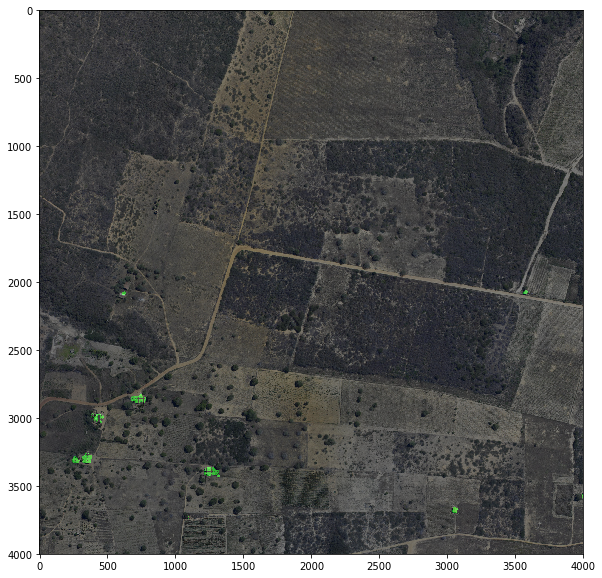

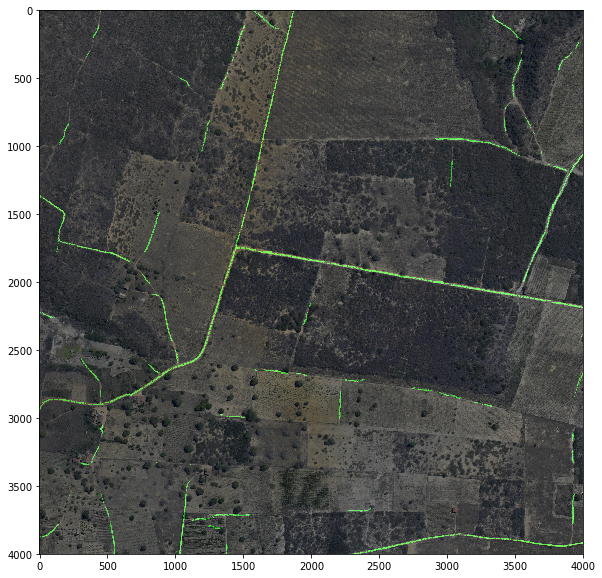

In [0]:
#
folder_img = "./testes/043.jpg"
#folder_mask = ""
folder_destination = './testes/043_'

img = cv2.imread(folder_img)
#mask = cv2.imread(folder_mask, 0)

for classe in unet_model.classes:
  mask_pred = unet_model.predict_greater_image(classe, img)

  mask_pred2 = cv2.cvtColor(mask_pred.astype('uint8')*255, cv2.COLOR_GRAY2RGB)
  mask_pred2 = mask_pred2*(0,1,0)

  overlay = img.copy()
  opacity = 0.5
  cv2.addWeighted(mask_pred2.astype('uint8'), opacity, img.astype('uint8'), 1 - opacity, 0, overlay)
  #cv2.addWeighted((cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)*(1,0,1)).astype('uint8'), opacity, overlay.astype('uint8'), 1 - opacity, 0, overlay)
  plt.figure(figsize=(20,10))
  plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB));

  cv2.imwrite(folder_destination+classe+".jpg", overlay)